In [202]:
import pandas as pd
import os
from multiprocessing import Pool
import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
import pickle

In [3]:
os.chdir('/home/lucasperea/GraphMaterials/')
os.getcwd()

'/home/lucasperea/GraphMaterials'

In [20]:
%store -r results

In [47]:
%store -r path_dic

In [40]:
%store big_pore

Stored 'big_pore' (list)


In [200]:
os.getcwd()

'/home/lucasperea/GraphMaterials'

In [203]:
    
with open('../Documents/Diffusion_MOF/Results/Data/1249/path_dic', 'wb') as handle:
    pickle.dump(path_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../Documents/Diffusion_MOF/Results/Data/1249/mat_dic', 'wb') as handle:
    pickle.dump(mat_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
names_mof_rank = list(path_dic.keys())

In [28]:
pd.set_option('display.max_rows', 100)
big_pore = list(max_vol_coef.iloc[600:, :].index)
%store big_pore


Stored 'big_pore' (list)


In [170]:
dif_sort

,MOF,DiffCoef,order
1287,FIPWOS_clean,5.550894e-07,0
5389,YEMTIV_clean,5.999096e-07,1
5304,XUNGOD_clean,7.464716e-07,2
2762,MIMFOF_clean,8.821565e-07,3
43,ADIQEL_clean,1.140351e-06,4
...,...,...,...
4037,SAXLEK_clean,1.641456e-03,1244
1847,IDUTUW_clean,2.818309e-03,1245
3839,REGJIW_clean,2.868988e-03,1246
3840,REGJIW01_clean,3.514168e-03,1247


In [196]:
view_list = []
for name in list(view.index):
    view_list.append(dic_view[name])

In [197]:
# max_vol_coef.loc[max_vol_coef.index == 'VABJIS_clean']
# # max_vol_coef['MOF'] = max_vol_coef.index
view = max_vol_coef.loc[max_vol_coef.index.isin(['VEXYON_charged', 'VABJIS_clean', 'REGJIW01_clean']), ['VolDist']]
s = list(dif_sort.loc[dif_sort['MOF'].isin(['VEXYON_charged', 'VABJIS_clean', 'REGJIW01_clean']), ['DiffCoef']].values)
t = list(dif_sort.loc[dif_sort['MOF'].isin(['VEXYON_charged', 'VABJIS_clean', 'REGJIW01_clean']), ['MOF']].values)
dic_view = {t[i][0]:s[i][0] for i in range(len(t))}
view['DiffCoef'] = view_list

In [198]:
view

,VolDist,DiffCoef
REGJIW01_clean,31.41,0.003514
VABJIS_clean,38.92,0.004022
VEXYON_charged,364.28,0.000016


In [116]:
%store -r path_dic
%store -r mat_dic

In [115]:
mof_index = list(dif_sort.sort_values(by='MOF')['MOF'])

In [117]:
# Comparison between volume/distance paramater and diffusion coefficient

raw_vol_df = pd.DataFrame(path_dic).transpose()
print(raw_vol_df.isnull().values.any())
print(raw_vol_df.isnull().sum())
max_vol_coef = pd.DataFrame(raw_vol_df.max(axis=1), columns=['VolDist'])
max_vol_coef = max_vol_coef.sort_values(by='VolDist', ascending=True)
max_vol_coef = max_vol_coef.assign(order=list(range(1249)))

# dif_db.rename(columns={'MOF (Refcodes)':'MOF', 'Self diffusion of CH4 (cm2/s) at 1 bar, 298 K':'DiffCoef'},
#                inplace=True)
dif_sort = dif_db.loc[dif_db['MOF'].isin(max_vol_coef.index)].sort_values(by='DiffCoef')
dif_sort = dif_sort.assign(order=list(range(len(dif_sort))))
dif_sort

False
-1-1-1    0
-1-10     0
-1-11     0
-10-1     0
-100      0
-101      0
-11-1     0
-110      0
-111      0
0-1-1     0
0-10      0
0-11      0
00-1      0
dtype: int64


,MOF,DiffCoef,order
1287,FIPWOS_clean,5.550894e-07,0
5389,YEMTIV_clean,5.999096e-07,1
5304,XUNGOD_clean,7.464716e-07,2
2762,MIMFOF_clean,8.821565e-07,3
43,ADIQEL_clean,1.140351e-06,4
...,...,...,...
4037,SAXLEK_clean,1.641456e-03,1244
1847,IDUTUW_clean,2.818309e-03,1245
3839,REGJIW_clean,2.868988e-03,1246
3840,REGJIW01_clean,3.514168e-03,1247


In [246]:
diic = {'hola':5, 'adios':6}
pr_analysis = pd.DataFrame(mat_dic, index=['MostConnectedNodeCell','RadiusMCNC','MostConnectedNodeCellValue']).transpose()
y_simple = list(pr_analysis.sort_index()['MostConnectedNodeCellValue'])
x_simple = list(dif_sort.sort_values(by='MOF')['DiffCoef'])

Spearmans correlation: 0.207
Pearsonr correlation: 0.207


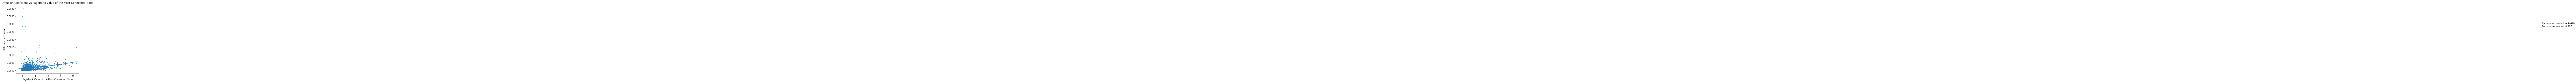

In [256]:
corr1, _ = spearmanr(x_simple, y_simple)
print('Spearmans correlation: %.3f' % corr)
corr2, _ = pearsonr(x_simple, y_simple)
print('Pearsonr correlation: %.3f' % corr)



data_1249 = pd.DataFrame(data={'DiffCoef':np.array(x_simple), 'MostConnectedNodeCellValue':y_simple}, index=mof_index)
sns.lmplot(x="MostConnectedNodeCellValue", y="DiffCoef", data=data_1249,
           order=2, ci=None, scatter_kws={"s": 10});
plt.title('Diffusion Coeficient vs PageRank Value of the Most Connected Node')
plt.xlabel('PageRank Value of the Most Connected Node')
plt.ylabel('Diffusion Coefficient')
plt.text(400,0.003,'Spearmans correlation: %.3f' % corr1)
plt.text(400,0.0028,'Pearsonr correlation: %.3f' % corr2)


plt.savefig('../Documents/Diffusion_MOF/Results/Plots/1249/PRV.jpg')


Spearmans correlation: 0.426
Pearsonr correlation: 0.207


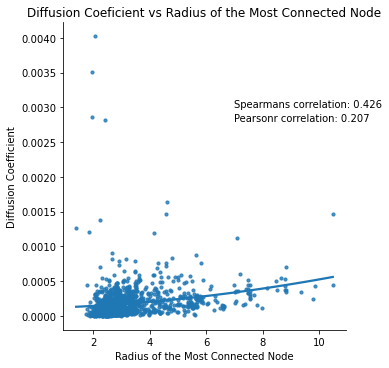

In [257]:
y_simple = list(pr_analysis.sort_index()['RadiusMCNC'])
data_1249 = pd.DataFrame(data={'DiffCoef':x_simple, 'RadiusMCNC':y_simple}, index=mof_index)

sns.lmplot(x="RadiusMCNC", y="DiffCoef", data=data_1249,order=2, ci=None, scatter_kws={"s": 10})
plt.title('Diffusion Coeficient vs Radius of the Most Connected Node')
plt.xlabel('Radius of the Most Connected Node')
plt.ylabel('Diffusion Coefficient')


corr, _ = spearmanr(x_simple, np.array(y_simple))
print('Spearmans correlation: %.3f' % corr)

plt.text(7,0.003,'Spearmans correlation: %.3f' % corr)

corr, _ = pearsonr(x_simple, np.array(y_simple))
print('Pearsonr correlation: %.3f' % corr)


plt.text(7,0.0028,'Pearsonr correlation: %.3f' % corr)
plt.savefig('../Documents/Diffusion_MOF/Results/Plots/1249/RadiusMCN.jpg')

In [126]:
pr_analysis.sort_index()

,MostConnectedNodeCell,RadiusMCNC,MostConnectedNodeCellValue
ABIXOZ_clean,294.0,2.98807,87.009852
ABULOB_clean,337.0,2.21994,76.212173
ACUBAB_clean,81.0,3.23810,214.771509
ADAXEK_clean,119.0,2.75382,151.439388
ADIQEL_clean,53.0,2.03687,106.548957
...,...,...,...
ZOMNOG_clean,103.0,3.08468,94.053272
ZOMNUM_clean,103.0,3.16918,107.029212
ZUNZIT_clean,353.0,2.06045,88.527059
ZUPBET_clean,147.0,2.33140,87.892846


In [124]:
max_vol_coef.sort_index()

,VolDist,order
ABIXOZ_clean,54.05,451
ABULOB_clean,38.41,160
ACUBAB_clean,89.08,820
ADAXEK_clean,40.83,204
ADIQEL_clean,28.02,30
...,...,...
ZOMNOG_clean,89.88,823
ZOMNUM_clean,89.40,821
ZUNZIT_clean,56.13,486
ZUPBET_clean,56.12,485


In [162]:

y_simple = list(max_vol_coef.sort_index()['VolDist'])

# my_rho = np.corrcoef(x_simple, y_simple)
# my_rho

Spearmans correlation: 0.474
Pearsonr correlation: 0.204


Text(1.6750000000000114, 0.5, 'Diffusion Coefficient')

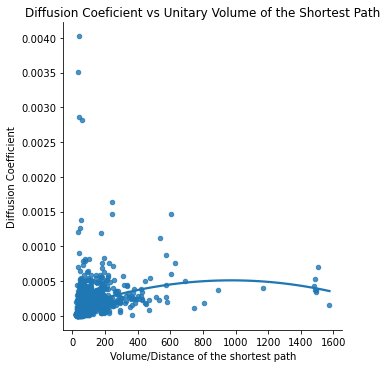

In [167]:
corr, _ = spearmanr(x_simple, y_simple)
print('Spearmans correlation: %.3f' % corr)
corr, _ = pearsonr(x_simple, y_simple)
print('Pearsonr correlation: %.3f' % corr)

data_1249 = pd.DataFrame(data={'DiffCoef':np.array(x_simple), 'VolDist':y_simple}, index=mof_index)
sns.lmplot(x="VolDist", y="DiffCoef", data=data_1249,
           order=2, ci=None, scatter_kws={"s": 20});
plt.title('Diffusion Coeficient vs Unitary Volume of the Shortest Path')
plt.xlabel('Volume/Distance of the shortest path')
plt.ylabel('Diffusion Coefficient')

In [26]:
names = list(pd.DataFrame(results).transpose().index)

In [51]:
list(results[0].items())[0]

('SONVAT_neutral_b',
 {'MostConnectedNodeCell': 148,
  'RadiusMCNC': 6.59498,
  'MostConnectedNodeCellValue': 1462.3628692279478})

In [58]:
pagerank_dif = {'MOF':[], 'DiffusionCoef':[]}
for dictionary in results:
    name, inner_dic = list(dictionary.items())[0]
    pagerank_dif['MOF'].append(name) 
    pagerank_dif['DiffusionCoef'].append(inner_dic['MostConnectedNodeCellValue'])

In [61]:
pagerank_dif_df = pd.DataFrame(data=pagerank_dif, columns=['MOF', 'DiffusionCoef'])

In [118]:
dic_num_nodes = {a:b for a, b in names_num_nodes}

list_num_nodes = [dic_num_nodes[name] for name in sorted(list(pagerank_dif_df['MOF']))]

dic_num_nodes['ZUNZIT_clean']   

502

In [119]:
# df_3 = pagerank_dif_df.assign()
# names_num_nodes
sorted(list(pagerank_dif_df['MOF']))
names_num_nodes
df_3 = pagerank_dif_df.sort_values(by='MOF')
df_4 = df_3.assign(NumNodes=list_num_nodes)
df_5 = df_4.assign(RelDifCoef=df_4["DiffusionCoef"].div(df_4["NumNodes"]))

In [120]:
df_5

,MOF,DiffusionCoef,NumNodes,RelDifCoef
130,ABIXOZ_clean,450.838408,466,0.967464
49,ABULOB_clean,385.670048,660,0.584349
989,ACUBAB_clean,1189.720288,498,2.388997
806,ADAXEK_clean,818.319368,337,2.428247
667,ADIQEL_clean,565.206389,464,1.218117
...,...,...,...,...
743,ZOMNOG_clean,480.406897,525,0.915061
991,ZOMNUM_clean,545.096662,552,0.987494
454,ZUNZIT_clean,495.254233,502,0.986562
583,ZUPBET_clean,494.736328,494,1.001491


In [121]:
pagerank_sort = df_5.sort_values(by='RelDifCoef')

In [60]:
dif_db = pd.read_excel('../Downloads/MOF_Diffusion_CH4.xlsx')
dif_db

,MOF (Refcodes),"Self diffusion of CH4 (cm2/s) at 1 bar, 298 K"
0,ABAYIO_clean,0.000004
1,ABAYOU_clean,0.000011
2,ABETIN_clean,0.000316
3,ABEXEM_clean,0.000025
4,ABEXEN_clean,0.000130
...,...,...
5594,ZUNZIT_clean,0.000063
5595,ZUPBET_clean,0.000039
5596,ZUQMAB_clean,0.000019
5597,ZURROT_clean,0.000031


In [123]:
dif_sort = dif_db.loc[dif_db['MOF (Refcodes)'].isin(pagerank_sort['MOF'])].sort_values(by='Self diffusion of CH4 (cm2/s) at 1 bar, 298 K')

In [124]:
df_1 = pagerank_sort.assign(order=list(range(len(dif_sort))))
df_2 = dif_sort.assign(order=list(range(len(dif_sort))))

In [129]:
df_2

,MOF (Refcodes),"Self diffusion of CH4 (cm2/s) at 1 bar, 298 K",order
1287,FIPWOS_clean,5.550894e-07,0
5389,YEMTIV_clean,5.999096e-07,1
5304,XUNGOD_clean,7.464716e-07,2
2762,MIMFOF_clean,8.821565e-07,3
43,ADIQEL_clean,1.140351e-06,4
...,...,...,...
4037,SAXLEK_clean,1.641456e-03,1245
1847,IDUTUW_clean,2.818309e-03,1246
3839,REGJIW_clean,2.868988e-03,1247
3840,REGJIW01_clean,3.514168e-03,1248


In [127]:
# df_3 = df_1.assign()
df_1

,MOF,DiffusionCoef,NumNodes,RelDifCoef,order
576,ECOLEP_clean,201.119535,704,0.285681,0
796,QIGBIR_clean,177.249775,616,0.287743,1
268,CUSZIB_clean,176.552412,576,0.306515,2
539,EFOSUO_clean,188.946064,616,0.306731,3
515,KEYYET_clean,190.777398,616,0.309704,4
...,...,...,...,...,...
709,PIYZAZ_clean,309.286593,16,19.330412,1245
979,LAWGIA_clean,3040.281226,154,19.742086,1246
1111,LAWGUM_clean,3191.524960,151,21.135927,1247
593,LAWGOG_clean,3312.600312,151,21.937750,1248


In [130]:
for a in [df_2.iloc[i, 2] - df_1.loc[df_1['MOF'] == df_2.iloc[i, 0], ['order']].values for i in range(len(df_2))]:
    print(a)

[[-1068]]
[[-411]]
[[-659]]
[[-733]]
[[-711]]
[[-350]]
[[-842]]
[[-1132]]
[[-314]]
[[-434]]
[[-619]]
[[-387]]
[[-862]]
[[-316]]
[[-1043]]
[[-465]]
[[-490]]
[[-658]]
[[-612]]
[[-427]]
[[-904]]
[[-381]]
[[-228]]
[[-565]]
[[-569]]
[[-1040]]
[[-886]]
[[-877]]
[[-711]]
[[-460]]
[[-366]]
[[-261]]
[[-768]]
[[-838]]
[[-755]]
[[-1012]]
[[-447]]
[[-940]]
[[-616]]
[[-187]]
[[-745]]
[[-1013]]
[[-143]]
[[-522]]
[[-893]]
[[-449]]
[[-716]]
[[-688]]
[[-4]]
[[-561]]
[[-676]]
[[-613]]
[[-150]]
[[-282]]
[[-278]]
[[-338]]
[[-871]]
[[-1101]]
[[-183]]
[[-301]]
[[-259]]
[[-881]]
[[-719]]
[[-623]]
[[-752]]
[[-636]]
[[-729]]
[[-851]]
[[-903]]
[[-741]]
[[-72]]
[[-813]]
[[-950]]
[[-664]]
[[-195]]
[[-578]]
[[-436]]
[[-304]]
[[-316]]
[[-836]]
[[-580]]
[[-1053]]
[[-894]]
[[-785]]
[[-1146]]
[[-796]]
[[-644]]
[[-878]]
[[-369]]
[[-79]]
[[-256]]
[[-509]]
[[-615]]
[[-279]]
[[-362]]
[[-229]]
[[-91]]
[[-3]]
[[-238]]
[[-132]]
[[-336]]
[[-672]]
[[-590]]
[[-540]]
[[-708]]
[[-62]]
[[-643]]
[[-810]]
[[-516]]
[[-1107]]
[[-599]]

[[290]]
[[470]]
[[599]]
[[1014]]
[[793]]
[[506]]
[[462]]
[[137]]
[[899]]
[[276]]
[[-52]]
[[554]]
[[912]]
[[934]]
[[175]]
[[632]]
[[-201]]
[[275]]
[[401]]
[[201]]
[[425]]
[[753]]
[[844]]
[[903]]
[[-148]]
[[43]]
[[511]]
[[-188]]
[[409]]
[[899]]
[[350]]
[[474]]
[[-158]]
[[-197]]
[[323]]
[[323]]
[[847]]
[[803]]
[[850]]
[[887]]
[[-67]]
[[435]]
[[237]]
[[569]]
[[670]]
[[1021]]
[[984]]
[[791]]
[[1017]]
[[367]]
[[746]]
[[1049]]
[[156]]
[[204]]
[[44]]
[[1003]]
[[-133]]
[[409]]
[[635]]
[[1069]]
[[59]]
[[458]]
[[77]]
[[-106]]
[[-147]]
[[433]]
[[175]]
[[96]]
[[-57]]
[[793]]
[[679]]
[[-92]]
[[1086]]
[[48]]
[[1007]]
[[-34]]
[[1034]]
[[944]]
[[731]]
[[-80]]
[[1085]]
[[558]]
[[-141]]
[[844]]
[[674]]
[[782]]
[[874]]
[[-65]]
[[93]]
[[283]]
[[125]]
[[281]]
[[303]]
[[705]]
[[-93]]
[[844]]
[[-128]]
[[209]]
[[212]]
[[479]]
[[945]]
[[884]]
[[955]]
[[188]]
[[-79]]
[[331]]
[[769]]
[[231]]
[[802]]
[[16]]
[[1102]]
[[665]]
[[156]]
[[759]]
[[834]]
[[443]]
[[824]]
[[416]]
[[43]]
[[-66]]
[[92]]
[[-65]]
[[-45]]
[[585

In [96]:

pool = multiprocessing.Pool(multiprocessing.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
num_nodes = pool.map_async(CalcNum, list(df_1['MOF']))



# Step 3: Don't forget to close
pool.close()

In [97]:
names_num_nodes = num_nodes.get()

In [100]:
names_num_nodes

[('MAGNEQ03_clean', 128),
 ('MAGNEQ02_clean', 128),
 ('MAGNEQ04_clean', 128),
 ('TILWAM_clean', 164),
 ('RONZID_clean', 168),
 ('NINHOH_clean', 148),
 ('YUKVOQ_clean', 128),
 ('TILVUF_clean', 164),
 ('KECRAL12_clean', 416),
 ('LATCEO_clean', 348),
 ('GOGWAB_clean', 304),
 ('LEJBUX_clean', 308),
 ('YARYUL_clean', 347),
 ('GORQAF_clean', 76),
 ('CUSZIB_clean', 576),
 ('QIGBIR_clean', 616),
 ('VINROZ_clean', 148),
 ('WILRIS_clean', 456),
 ('GOGWEF_clean', 288),
 ('IWIPIO_clean', 500),
 ('CUZFOR_clean', 96),
 ('EFOSUO_clean', 616),
 ('KEYYET_clean', 616),
 ('WOFWET_clean', 296),
 ('MAGMOZ03_clean', 144),
 ('EFOTID_clean', 584),
 ('EFOTAV_clean', 624),
 ('KECRAL10_clean', 37),
 ('ITAPAU_clean', 501),
 ('MAGMOZ04_clean', 144),
 ('YEQRER_clean', 294),
 ('ECOLEP_clean', 704),
 ('JUTCUW_SL', 39),
 ('ROLCEC_clean', 140),
 ('AYONOT_clean', 132),
 ('ITAPIC_clean', 500),
 ('WEMBUN_clean', 316),
 ('SAYTUJ_clean', 200),
 ('FIPJAR01_clean', 504),
 ('YEQRIV_clean', 298),
 ('ROLCEC01_clean', 140),
 ('RO

In [95]:

def CalcNum(name):
    nodes_list = []
    with open('./Nt2Files_MOF/' + name + '.nt2') as f:
        line = ' '

        while line:
            line = f.readline()

            if line == 'Vertex table:\n': 

                while line:

                    line = f.readline()

                    if line == '\n':
                        break
                    else:
                        line_list = line.split()
                        key = int(line_list[0])
                        nodes_list.append(key)
#                         coord_x = float(line_list[1])
#                         coord_y = float(line_list[2])
#                         coord_z = float(line_list[3])
#                         min_dist_atom = float(line_list[4])
            elif line == 'Edge table:\n':
                break
                
    return (name, len(nodes_list))